[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
Shape: (16, 16)
[[0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
 [1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]]


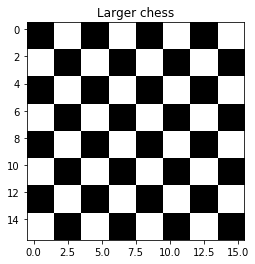

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter

N = 8
#chess = np.tile(np.array([[0.0 ,1.0], [1.0, 0.0]]), (N//2, N//2))

chess_r, chess_c = np.indices((N, N))
chess = (chess_r + chess_c) % 2

print(chess)

new_size = 2 # vezes o tamanho original
larger_chess = np.repeat(np.repeat(chess, new_size, axis=1), new_size, axis=0)

print("Shape: {}".format(larger_chess.shape))
print(larger_chess)

plt.title('Larger chess')
plt.imshow(larger_chess, cmap='gray')

In [193]:
filter = np.ones(9)
filter = filter//9
filter
kernel = ImageFilter.Kernel((3,3), filter)

In [191]:
filter = np.zeros((5,5))
filter[:,2] = -1
filter[2,:] = -1
filter[1::2,2:3] = -2
filter[2:3:,1::2] = -2
filter[2,2] = 16
filter
kernel = ImageFilter.Kernel((5,5), filter.ravel())

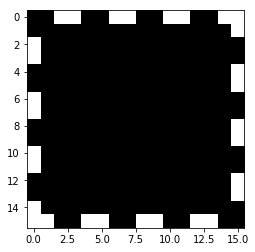

In [194]:
larger_chess *= (255//larger_chess.max())
image_chess = Image.fromarray(np.uint8(larger_chess))

plt.imshow(image_chess.filter(kernel))


In [285]:
def convolve(img_array, kernel):
    #temp_img = img_array.copy()

    temp_img = np.lib.pad(img_array, kernel.shape[0]//2, 'edge')
    for index, x in np.ndenumerate(temp_img):
        print('{}: {}'.format(index, temp_img[index]))

In [275]:
a = np.arange(25)
a = a.reshape((5,5))
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [286]:
c1 = np.repeat(3,9).reshape((3,3))
c2 = np.repeat(2,9).reshape((3,3))

print(c1)
print(b)
print(b.shape)

convolve(b, c1)

[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[ 0  0  1  2  3  4  4]
 [ 0  0  1  2  3  4  4]
 [ 5  5  6  7  8  9  9]
 [10 10 11 12 13 14 14]
 [15 15 16 17 18 19 19]
 [20 20 21 22 23 24 24]
 [20 20 21 22 23 24 24]]
(7, 7)
(0, 0): 0
(0, 1): 0
(0, 2): 0
(0, 3): 1
(0, 4): 2
(0, 5): 3
(0, 6): 4
(0, 7): 4
(0, 8): 4
(1, 0): 0
(1, 1): 0
(1, 2): 0
(1, 3): 1
(1, 4): 2
(1, 5): 3
(1, 6): 4
(1, 7): 4
(1, 8): 4
(2, 0): 0
(2, 1): 0
(2, 2): 0
(2, 3): 1
(2, 4): 2
(2, 5): 3
(2, 6): 4
(2, 7): 4
(2, 8): 4
(3, 0): 5
(3, 1): 5
(3, 2): 5
(3, 3): 6
(3, 4): 7
(3, 5): 8
(3, 6): 9
(3, 7): 9
(3, 8): 9
(4, 0): 10
(4, 1): 10
(4, 2): 10
(4, 3): 11
(4, 4): 12
(4, 5): 13
(4, 6): 14
(4, 7): 14
(4, 8): 14
(5, 0): 15
(5, 1): 15
(5, 2): 15
(5, 3): 16
(5, 4): 17
(5, 5): 18
(5, 6): 19
(5, 7): 19
(5, 8): 19
(6, 0): 20
(6, 1): 20
(6, 2): 20
(6, 3): 21
(6, 4): 22
(6, 5): 23
(6, 6): 24
(6, 7): 24
(6, 8): 24
(7, 0): 20
(7, 1): 20
(7, 2): 20
(7, 3): 21
(7, 4): 22
(7, 5): 23
(7, 6): 24
(7, 7): 24
(7, 8): 24
(8, 0): 20
(8, 1): 20
(8, 2): 20
(8, 3):